<a href="https://colab.research.google.com/github/SaiAnjesh/Xtern-Artificial-Intelligence-Work-Prompt/blob/main/AI_Work_Prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
  Author: Sai Anjesh
  Updated: 2023-10-17
"""

'\n  Author: Sai Anjesh\n  Updated: 2023-10-16\n'

In [ ]:
# Importing Libraries
from google.colab import files
import io
from typing import List
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Manually uploading input dataset
uploaded = files.upload()
print(uploaded)

Saving XTern 2024 Artificial Intelegence Data Set - Menu.csv to XTern 2024 Artificial Intelegence Data Set - Menu.csv
Saving XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv to XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv
{'XTern 2024 Artificial Intelegence Data Set - Menu.csv': b',Item,Price,Calories\r\n0,Hoosier BBQ Pulled Pork Sandwich,8,400\r\n1,Cornbread Hush Puppies,5,250\r\n2,Breaded Pork Tenderloin Sandwich,9,550\r\n3,Indiana Pork Chili,7,300\r\n4,Fried Catfish Basket,10,600\r\n5,Ultimate Grilled Cheese Sandwich (with bacon and tomato),6,450\r\n6,Sweet Potato Fries,4,200\r\n7,Indiana Corn on the Cob (brushed with garlic butter),3,150\r\n8,Indiana Buffalo Chicken Tacos (3 tacos),9,400\r\n9,Sugar Cream Pie,4,450', 'XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv': b'Year,Major,University,Time,Order\r\nYear 2,Physics,Indiana State University,12,Fried Catfish Basket\r\nYear 3,Chemistry,Ball State University,14,Sugar Cream Pie\r\n

In [ ]:
# Reading data
menu_data = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
order_data = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[1]]))

In [ ]:
print("------------------------------------------")
print(order_data.head(3))
print("------------------------------------------")
menu_data.rename(columns = {"Unnamed: 0" : "Class"}, inplace = True)
print(menu_data.head(3))
print("------------------------------------------")

------------------------------------------
     Year      Major                University  Time                 Order
0  Year 2    Physics  Indiana State University    12  Fried Catfish Basket
1  Year 3  Chemistry     Ball State University    14       Sugar Cream Pie
2  Year 3  Chemistry         Butler University    12    Indiana Pork Chili
------------------------------------------
   Class                              Item  Price  Calories
0      0  Hoosier BBQ Pulled Pork Sandwich      8       400
1      1            Cornbread Hush Puppies      5       250
2      2  Breaded Pork Tenderloin Sandwich      9       550
------------------------------------------


##EDA

(25%)  Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data.

In [ ]:
# Check the Information and Stats present in both the dataset
print("------------------------------------------")
print(order_data.info())
print("------------------------------------------")
print(menu_data.info())
print("------------------------------------------")

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     10 non-null     int64 
 1   Item      10 non-null     object
 2   Price     10 non-null     int64 
 3   Calories  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes
None
------------------------------------------


In [ ]:
# Check the Information and Stats present in both the dataset
print("------------------------------------------")
print(order_data.describe())
print("------------------------------------------")
print(menu_data.describe())

------------------------------------------
              Time
count  5000.000000
mean     12.528200
std       1.357193
min       8.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      17.000000
------------------------------------------
          Class      Price    Calories
count  10.00000  10.000000   10.000000
mean    4.50000   6.500000  375.000000
std     3.02765   2.460804  147.667043
min     0.00000   3.000000  150.000000
25%     2.25000   4.250000  262.500000
50%     4.50000   6.500000  400.000000
75%     6.75000   8.750000  450.000000
max     9.00000  10.000000  600.000000


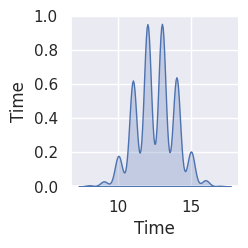

In [ ]:
# Creating a pair plot
sns.pairplot(order_data, diag_kind="kde")
plt.show()

In [ ]:
# Creating a histogram plot
fig = px.histogram(order_data['Time'], title='Histogram Example', nbins = 20)

# Show the plot in a Jupyter Notebook
fig.show()

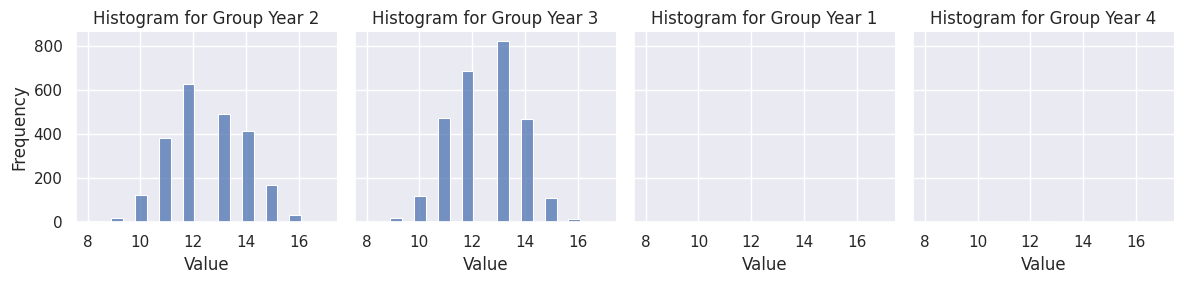

In [ ]:
g = sns.FacetGrid(order_data, col="Year")
g.map(sns.histplot, "Time", bins=20)

# Add labels and titles
g.set_axis_labels("Value", "Frequency")
g.set_titles("Histogram for Group {col_name}")

# Show the plots
plt.show()

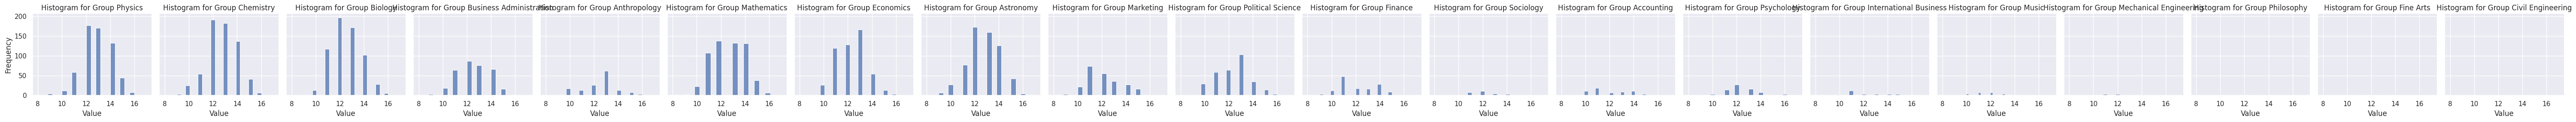

In [ ]:
g = sns.FacetGrid(order_data, col="Major")
g.map(sns.histplot, "Time", bins=20)

# Add labels and titles
g.set_axis_labels("Value", "Frequency")
g.set_titles("Histogram for Group {col_name}")

# Show the plots
plt.show()

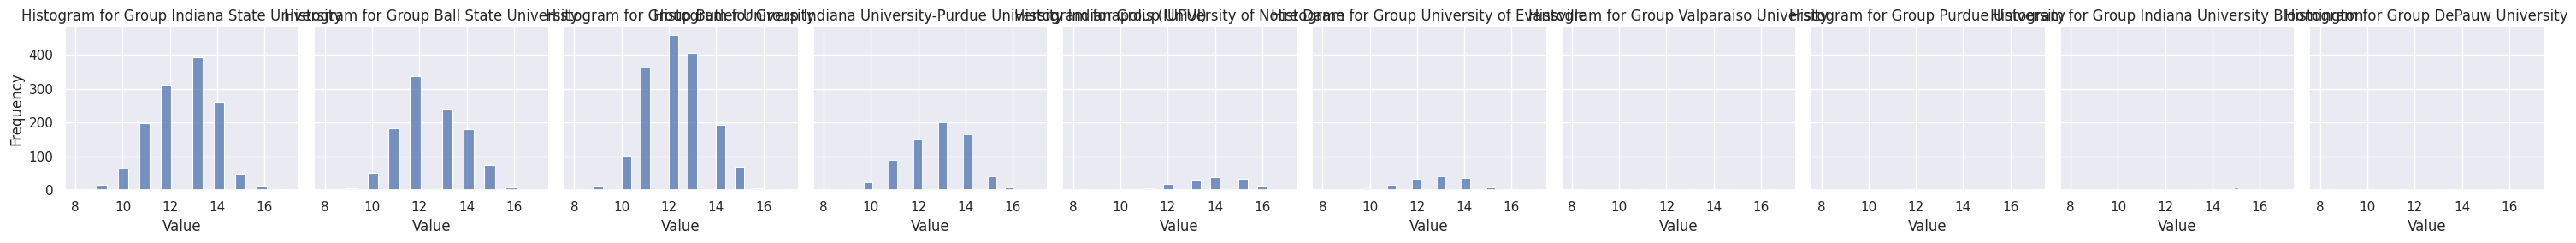

In [ ]:
g = sns.FacetGrid(order_data, col="University")
g.map(sns.histplot, "Time", bins=20)

# Add labels and titles
g.set_axis_labels("Value", "Frequency")
g.set_titles("Histogram for Group {col_name}")

# Show the plots
plt.show()

In [ ]:
# # Use groupby to find the count of Category2 grouped by Category1
# dv_var = 'Order'
# # count_df_1 = order_data.groupby(['Year'])[dv_var].value_counts().unstack(fill_value=0)
# # count_df_1 = order_data.groupby(['Major'])[dv_var].value_counts().unstack(fill_value=0)
# count_df_1 = order_data.groupby([dv_var])['University'].value_counts().unstack(fill_value=0)

# # Display the resulting DataFrame
# count_df_1

###***Notes***
* It is well known that we have only one feature 'Time' that is numerical.
* And other variables are categorical.
* We are gonna make an educated guess, that Time is 24 Hr time value
* Because the Min value is 8 and Max Value is 17, which can be translated to 8AM to 5PM.
* We also see that the orders have been heavily concentrated around the 12pm and 1pm.
* Biases in survey is the concentration of orders pertaining ti Year 2 and Year3 students. Year 1 and year 4 orders were insginificant.`

###***Business Use cases***

1. We can work on forecasting the demand of food items, which can be helpful in food preparation of the food trucks, which can further optimize path of food trucks for better sales

2. If we also have extra infromation on students who buy food items. it would be nice to build machine learning models to target marketing offers.

In [ ]:
# Let us check biases in the categorical variables

# List of categorical variables you want to check for biases
categorical_variables = ["Year",	"Major",	"University",'Order']

# Loop through each categorical variable
for variable in categorical_variables:

  print("------------------------------------------")
  category_counts = order_data[variable].value_counts()
  total_samples = len(order_data)

  # Calculate the percentage of each category
  category_percentages = category_counts / total_samples * 100

  # Check for biases (e.g., if any category has significantly lower or higher percentages)
  print(f"Biases in {variable}:")
  print(category_percentages)

------------------------------------------
Biases in Year:
Year 3    54.38
Year 2    45.46
Year 1     0.10
Year 4     0.06
Name: Year, dtype: float64
------------------------------------------
Biases in Major:
Chemistry                  12.80
Biology                    12.70
Astronomy                  12.38
Physics                    12.20
Mathematics                11.64
Economics                  10.22
Business Administration     6.68
Political Science           6.18
Marketing                   4.78
Anthropology                2.92
Finance                     2.70
Psychology                  1.52
Accounting                  1.24
Sociology                   0.62
International Business      0.58
Music                       0.42
Mechanical Engineering      0.22
Philosophy                  0.08
Fine Arts                   0.06
Civil Engineering           0.06
Name: Major, dtype: float64
------------------------------------------
Biases in University:
Butler University                    

We see that there is a bias in the data as feature hence I am

## Question 2

(30%) Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications

- Discuss Ethical implications of these factors
- Discuss Business outcome implications of these factors
- Discuss Technical implications of these factors

- Ethical Complications:
  - We see that there is a slight bais in the daat collection, that might be an unfair treatment
  - Collecting student data on food orders might be a slight invasion in privacy.

- Business Outcome:
  - It will be helpful in understanding the food items order pattern and targetting the marketing ads and offers.
  - We can also optimize the number of food products to cooK, in turn enhacing pricing strategy

-


## Question 3

(35%) Build a model to predict a customers order from their available information.  You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn

1. Outline your process for model selection, training and testing. Including data preparation.
2. Design a function that prepares your data by loading the provided dataset and processes it into an appropriate machine readable format if necessary.
3. Design a function to train your model and pickle it.
4. Train and test your model.  Submit any training, testing and model selection visuals or metrics.
5. Upload your work to GitHub and link the repository, make sure it is public.

In [ ]:
def data_preparation_fn(dataset: pd.DataFrame, target_column: str)-> List :

  if target_column not in dataset.columns:
        raise ValueError(f"Target column '{target_column}' not found in the dataset.")

  dataset = dataset.drop(columns=['Item', 'Price', 'Calories', "Order"]) # Removing unnecssary columns
  # dataset = dataset.drop(columns=['Item', "Order"]) # Removing unnecssary columns

  # Test : Year CHange
  dataset["Year"] = dataset["Year"].str.replace("Year ", "")
  dataset["Year"] = dataset["Year"].astype('int')

  dummy_cols = [
      # "Year",
      "Major",
      "University",
      ]
  if any(map(lambda v: v in dummy_cols, dataset.columns.tolist())):
    dataset = pd.get_dummies(data=dataset, columns=dummy_cols, drop_first=False)


  dataset = dataset.rename(columns = dict(zip(dataset.columns.tolist(), [i if '_' not in i else i.split('_')[1] for i in dataset.columns])))

  # Extract features (X) and the target variable (y)
  X = dataset.drop(columns=[target_column])
  y = dataset[target_column]
  return [X,  y, dataset]

In [ ]:
def model_training_fn(X, y, test_size_val, plot = False, create_pickle = True) -> List:

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_val, random_state=123)

  # # LOGISTIC REGRESSION
  # model = LogisticRegression()
  # model.fit(X_train, y_train)
  # y_pred = model.predict(X_test)

  # # RANDOM FOREST - Using thi
  model = RandomForestClassifier(n_estimators=100, random_state=123)
  model.fit(X_train, y_train)

  # Make predictions
  y_pred_train = model.predict(X_train)
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  # Evaluate the model
  accuracy_train = accuracy_score(y_train, y_pred_train)
  report_train = classification_report(y_train, y_pred_train)

  # Plot Important Fetauures
  if(plot):
    feature_importances = model.feature_importances_
    feature_names = X_test.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance Plot")
    plt.show()

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()

  if(create_pickle):
    model_filename = 'trained_model.pkl'
    with open(model_filename, 'wb') as model_file:
      pickle.dump(model, model_file)

  return [model, accuracy, report, X_train, X_test, y_train, y_test, accuracy_train, report_train]

In [ ]:

# Merge the data to check
merged_data = pd.merge(
    left = order_data,
    right = menu_data,
    how = "left",
    left_on = "Order",
    right_on = "Item",
)

In [ ]:

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
 5   Class       5000 non-null   int64 
 6   Item        5000 non-null   object
 7   Price       5000 non-null   int64 
 8   Calories    5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 390.6+ KB


In [ ]:
# data_preparation_fn(dataset= merged_data.copy(), target_column = 'Class')[2].to_cs

In [ ]:
X, y, _= data_preparation_fn(dataset= merged_data.copy(), target_column = 'Class')

In [ ]:
# X.info()

each class same amount of training data points - support

In [ ]:
# y_train.value_counts()

In [ ]:
# y_test.value_counts()

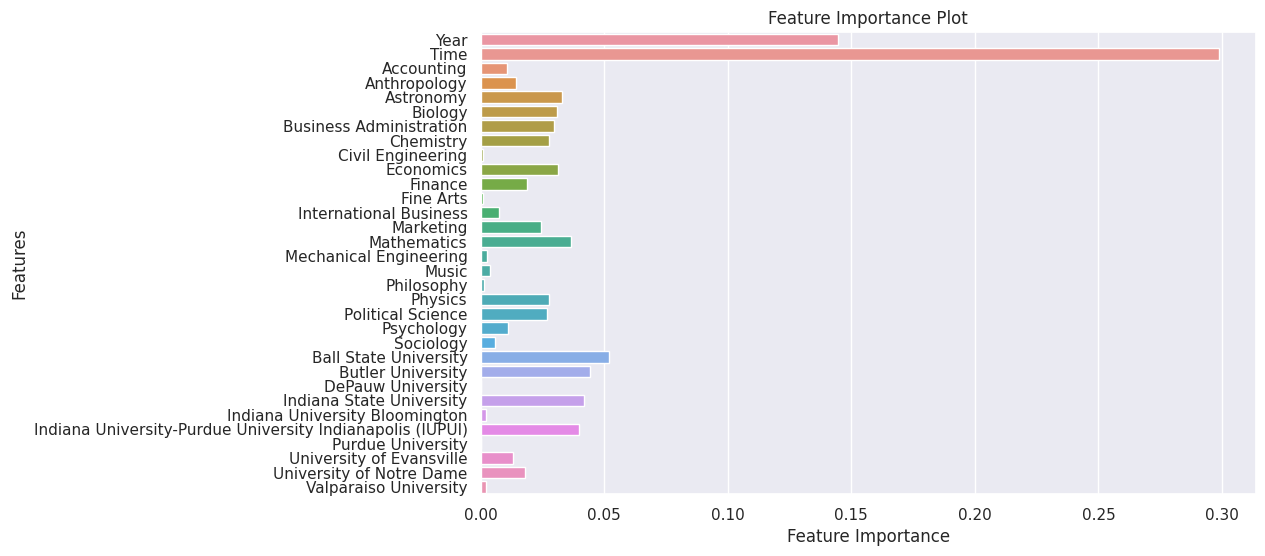

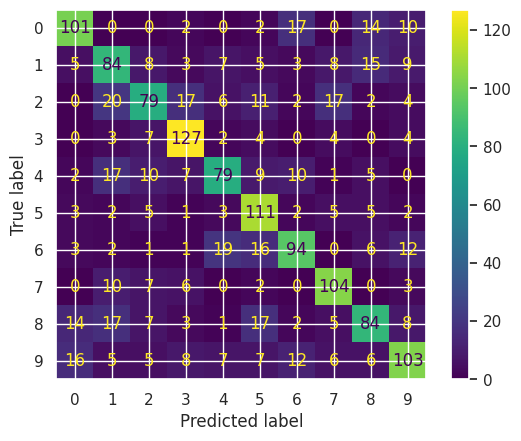

In [ ]:
model, accuracy, report, X_train, X_test, y_train, y_test, accuracy_train, report_train = model_training_fn(X, y, test_size_val = 0.3, plot = True)

In [ ]:
print(accuracy_train)
print(report_train)

0.7397142857142858
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       336
           1       0.71      0.72      0.71       363
           2       0.74      0.60      0.67       336
           3       0.79      0.88      0.83       359
           4       0.80      0.73      0.77       350
           5       0.71      0.84      0.77       364
           6       0.73      0.61      0.67       354
           7       0.77      0.89      0.82       363
           8       0.69      0.62      0.65       338
           9       0.70      0.74      0.72       337

    accuracy                           0.74      3500
   macro avg       0.74      0.74      0.74      3500
weighted avg       0.74      0.74      0.74      3500



In [ ]:
print(report)
print(accuracy)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       146
           1       0.53      0.57      0.55       147
           2       0.61      0.50      0.55       158
           3       0.73      0.84      0.78       151
           4       0.64      0.56      0.60       140
           5       0.60      0.80      0.69       139
           6       0.66      0.61      0.64       154
           7       0.69      0.79      0.74       132
           8       0.61      0.53      0.57       158
           9       0.66      0.59      0.62       175

    accuracy                           0.64      1500
   macro avg       0.64      0.65      0.64      1500
weighted avg       0.64      0.64      0.64      1500

0.644
